# 2 - Distributions, range, standard deviation

# Introduction to Statistics: Distributions, Range, Standard Deviation, Confidence Intervals
## 1. Measures of Central Variance (Range, Standard Deviation)

First, let's import the libraries we'll need:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

## Range

The range is the difference in maximum and minimum values in a dataset. It gives us a rough estimate about the spread of the data. 

# $R = \rm{max} - \rm{min}$

Here we import our dataset for NBA player stats in the 2021-2022 regular season. We list some important information, including a sample of the data so that we get a sense of what we are dealing with, and all of the column names

In [69]:
NBA_regular_2021 = pd.read_csv('Data/NBA_2021-2022_stats_Regular.csv', engine='python', delimiter=';')

print(np.asarray(NBA_regular_2021.columns), len(NBA_regular_2021.columns))

NBA_regular_2021

['Rk' 'Player' 'Pos' 'Age' 'Tm' 'G' 'GS' 'MP' 'FG' 'FGA' 'FG%' '3P' '3PA'
 '3P%' '2P' '2PA' '2P%' 'eFG%' 'FT' 'FTA' 'FT%' 'ORB' 'DRB' 'TRB' 'AST'
 'STL' 'BLK' 'TOV' 'PF' 'PTS'] 30


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,0.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
808,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,0.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
809,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,0.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3
810,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,0.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2


### column meanings

In case you're not very familiar with NBA stats, here are the meanings of each column:

#### Rk: ID
#### Player: player name
#### Pos: position
#### Age: player age
#### Tm: team
#### G: games
#### GS: games started
#### MP: minutes played
#### FG: field goals made - the combined total number of two-point and three-point baskets scored by a player or team (not the same as points scored)
#### FGA: field goals attempted
#### FG%: field goal percentage
#### 3P: 3-pointers made - the total number of 3-point shots made
#### 3PA: 3-pointers attempted
#### 3P%: 3-point percentage
#### 2P: 2-pointers made - the total number of 2-point shots made
#### 2PA: 2-pointers attempted
#### 2P%: 2-point percentage
#### eFG%: effective Field Goal Percentage; the formula is (FG + 0.5 * 3P) / FGA. This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.
#### FT: free-throws made - the total number of free-throws made
#### FTA: free-throws attempted
#### FT%: free-throw precentage
#### ORB: offensive rebounds - the total number of rebounds collected by a player or team while playing offense
#### DRB: defensive rebounds - the total number of rebounds collected by a player or team while playing defense
#### TRB: total rebounds
#### AST: assists
#### STL: steals
#### BLK: blocks
#### TOV: turnovers (losing the ball to the other team before making a shot)
#### PF: personal fouls - the total number of personal fouls commited by the player
#### PTS: points scored

### 🔍 EXERCISE 1: Find the range of ages in NBA players

In [29]:
MaxAge=np.max(NBA_regular_2021['Age'])
MinAge=np.min(NBA_regular_2021['Age'])

AgeRange = MaxAge - MinAge

print("Range of Ages of NBA players (2021): ", AgeRange)

Range of Ages of NBA players (2021):  22


## Standard Deviation
The standard deviation tells us how spread out the numbers in a dataset are from the average (mean). We calculate it with the forumlae:

### for an entire population
## $\sigma = \sqrt{ \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2 }$

### for a sample of a population
## $s = \sqrt{ \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})^2 }$


We can use the std() function in pandas to find the standard deviation

In [60]:
Age_sigma=NBA_regular_2021['Age'].std()

print("Standard deviation of NBA player ages (2021): ", Age_sigma)

Standard deviation of NBA player ages (2021):  4.05963978682536


Let's visualize this distribution along with the mean

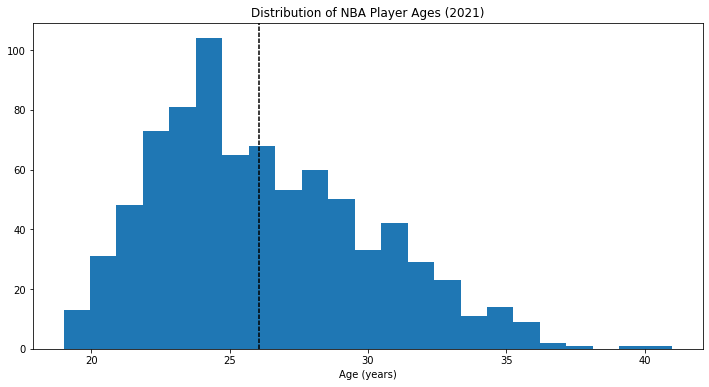

In [62]:
plt.figure(figsize=(12, 6))
plt.xlabel('Age (years)')
plt.title('Distribution of NBA Player Ages (2021)')

AverageAge=np.mean(NBA_regular_2021['Age'])

plt.hist(NBA_regular_2021['Age'], bins=23)
plt.axvline(AverageAge, color='black', dashes=[3,1])
plt.show()

Now let's visualize the standard deviation and confidence intervals, to get a sense of the spread in the data

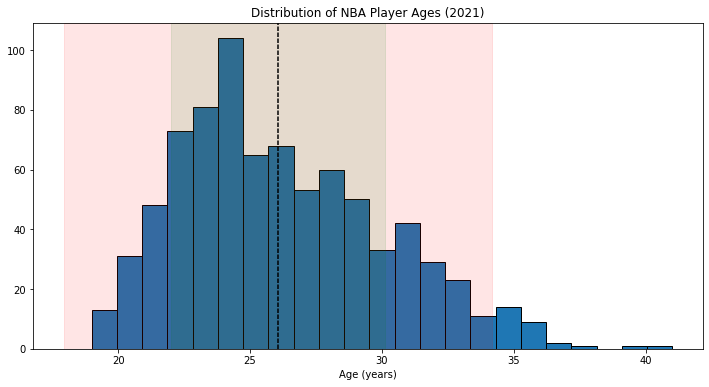

In [68]:
plt.figure(figsize=(12, 6))
plt.xlabel('Age (years)')
plt.title('Distribution of NBA Player Ages (2021)')

AverageAge=np.mean(NBA_regular_2021['Age'])

plt.hist(NBA_regular_2021['Age'], bins=23, edgecolor='black')
plt.axvline(AverageAge, color='black', dashes=[3,1])

plt.axvspan(AverageAge-2*Age_sigma, AverageAge+2*Age_sigma, 0, color='red', alpha=0.1, label='±2σ (95%)')
plt.axvspan(AverageAge-Age_sigma, AverageAge+Age_sigma, 0, color='green', alpha=0.1, label='±σ (95%)')

plt.show()

### 🔍 EXERCISE 2: Play around with the 2021 Regular season NBA dataset - look for variables that have a normal distribution - which ones can you find that fit this criterion. Why do you think that is?

### 🔍 EXERCISE 3: Find the standard deviation of the data you chose

### 🔍 EXERCISE 4: Make a histogram of the data - visualize the mean of the population with a vertical line

### 🔍 EXERCISE 5: visualize the 1$\sigma$ and 2$\sigma$ confidence intervals on this histogram - what can you say about the confidence intervals? How much data can you expect to find within each interval?